![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [ ]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

# Task 2: The Dataset
### Import MNIST

In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [2]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Plot an Image Example

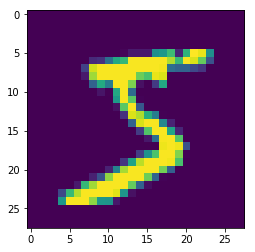

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

plt.show()

### Display Labels

In [6]:
y_train[0]

5

In [7]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [9]:
y_train_encoded.shape, y_test_encoded.shape

((60000, 10), (10000, 10))

### Display Encoded Labels

In [11]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [13]:
import numpy as np
x_train_reshaped =  np.reshape(x_train, (60000, 784))
x_test_reshaped =  np.reshape(x_test, (10000, 784))

In [14]:
x_train_reshaped.shape, x_test_reshaped.shape

((60000, 784), (10000, 784))

### Display Pixel Values

In [17]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [24]:
x_train_norm = (x_train_reshaped - x_train_reshaped.min()) / x_train_reshaped.max()
x_test_norm = (x_test_reshaped - x_test_reshaped.min()) / x_test_reshaped.max()

### Display Normalized Pixel Values

In [25]:
print(set(x_train_norm[0]))

{0.0, 0.49411764705882355, 0.6862745098039216, 1.0, 0.4980392156862745, 0.9921568627450981, 0.06274509803921569, 0.5098039215686274, 0.611764705882353, 0.6274509803921569, 0.00392156862745098, 0.15294117647058825, 0.21568627450980393, 0.07058823529411765, 0.25098039215686274, 0.19215686274509805, 0.00784313725490196, 0.3137254901960784, 0.3058823529411765, 0.011764705882352941, 0.3686274509803922, 0.1411764705882353, 0.13725490196078433, 0.25882352941176473, 0.3215686274509804, 0.4470588235294118, 0.5215686274509804, 0.5294117647058824, 0.6705882352941176, 0.6745098039215687, 0.7333333333333333, 0.7176470588235294, 0.7450980392156863, 0.788235294117647, 0.8588235294117647, 0.8352941176470589, 0.09019607843137255, 0.8862745098039215, 0.8980392156862745, 0.9490196078431372, 0.9333333333333333, 0.9411764705882353, 0.9764705882352941, 0.984313725490196, 0.5333333333333333, 0.6509803921568628, 0.9686274509803922, 0.6666666666666666, 0.5450980392156862, 0.6039215686274509, 0.4666666666666667

# Task 6: Creating a Model
### Creating the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape=(784, )),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [28]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [31]:
model.fit(x_train_norm, y_train_encoded, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2899 - acc: 0.9173
Epoch 2/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2372 - acc: 0.9319
Epoch 3/5
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2037 - acc: 0.9420
Epoch 4/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1789 - acc: 0.9493
Epoch 5/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1596 - acc: 0.9543


### Evaluating the Model

In [33]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.1490 - acc: 0.9563


# Task 8: Predictions

### Predictions on Test Set

In [51]:
y_predicted = model.predict(x_test_norm)
print(y_predicted.shape)

(10000, 10)


In [52]:
y_predicted[0]

array([2.27255790e-04, 6.19628906e-07, 1.31282257e-03, 1.15078920e-03,
       9.02085333e-07, 1.18870594e-04, 2.34170315e-07, 9.96854484e-01,
       9.28390073e-05, 2.41213114e-04], dtype=float32)

### Plotting the Results

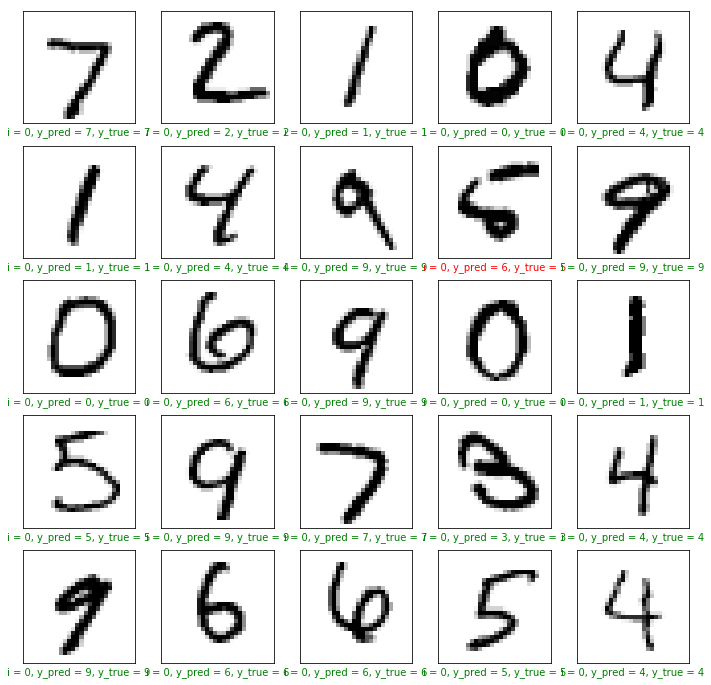

In [53]:
plt.figure(figsize=(12,12))
start_index = 0

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    
    y_pred = np.argmax(y_predicted[start_index + i])
    y_true = y_test[start_index + i]
    
    col = 'g'
    if y_pred != y_true:
        col = 'r'
    
    plt.xlabel("i = {}, y_pred = {}, y_true = {}".format(start_index, y_pred, y_true), color=col)
    plt.imshow(x_test[start_index+i], cmap = 'binary')
plt.show()

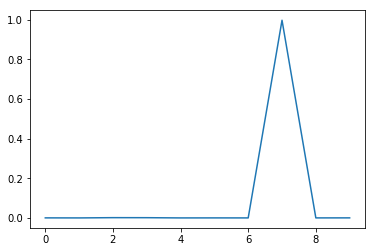

In [54]:
plt.plot(y_predicted[0])
plt.show()